In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
## Download the dataset
import urllib.request
urllib.request.urlretrieve ("https://archive.ics.uci.edu/ml/machine-learning-databases/20newsgroups-mld/20_newsgroups.tar.gz", "a.tar.gz")

('a.tar.gz', <http.client.HTTPMessage at 0x7f5f750ccc18>)

In [0]:
#Extracting the dataset
import tarfile
tar = tarfile.open("a.tar.gz")
tar.extractall()
tar.close()

In [0]:
##Make a list of the folders in the dataset
import os
directory = [f for f in os.listdir('./20_newsgroups') if not f.startswith('.')]
directory

['comp.os.ms-windows.misc',
 'soc.religion.christian',
 'talk.religion.misc',
 'sci.crypt',
 'rec.autos',
 'misc.forsale',
 'rec.sport.baseball',
 'sci.electronics',
 'comp.graphics',
 'alt.atheism',
 'comp.windows.x',
 'talk.politics.guns',
 'sci.space',
 'rec.motorcycles',
 'sci.med',
 'comp.sys.ibm.pc.hardware',
 'talk.politics.mideast',
 'rec.sport.hockey',
 'talk.politics.misc',
 'comp.sys.mac.hardware']

In [0]:
# import os
x = []
y = []
for category in os.listdir('./20_newsgroups'):
    for document in os.listdir(f"./20_newsgroups/{category}"):
#         with open(f"./20_newsgroups/{category}/{document}", 'r') as f:
        text = open(f"./20_newsgroups/{category}/{document}", 'r', errors='ignore').read()
        x.append(text)
        y.append(category)

In [0]:
len(x), len(y)

(19997, 19997)

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from re import sub
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
# Function to convert into simple pos tags
def get_simple_pos(tag):    
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return 'r'
    else:
        return wordnet.NOUN

In [0]:
X = []
for i in range(len(x)):
    a = sub('[^a-zA-Z]', " ", x[i])
    a = a.strip().split()
    lemmatizer = WordNetLemmatizer()
    a = [lemmatizer.lemmatize(word, pos = get_simple_pos(pos_tag([word])[0][1])).lower() for word in a if not word.lower() in set(stopwords.words('english'))]
    a = " ".join(a)
    X.append(a)
    print(i, end=" ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [0]:
from sklearn.preprocessing import LabelEncoder
y = np.array(y)
label_y = LabelEncoder()
y_final = label_y.fit_transform(y)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [0]:
# Finding optimum number of feature

score = {}
a = ['naive bayes', 'logistic', 'svc']
for i in a:
    score[i] = []

for features in range(1000, 2001, 100):
    tfidf = TfidfVectorizer(max_features= features, ngram_range= (1,3))
    temp = tfidf.fit_transform(X)
    clf_temp = MultinomialNB()
    clf_temp1 = LogisticRegression(n_jobs= -1)
    clf_temp2 = SVC(kernel= 'linear')
    score['naive bayes'].append(cross_val_score(estimator=clf_temp, X=temp, y=y_final, cv=5, n_jobs= -1).mean())
    score['logistic'].append(cross_val_score(estimator=clf_temp1, X=temp, y=y_final, cv=5, n_jobs= -1).mean())
    score['svc'].append(cross_val_score(estimator=clf_temp2, X=temp, y=y_final, cv=5, n_jobs= -1).mean())
    print(features, end = " ")

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 

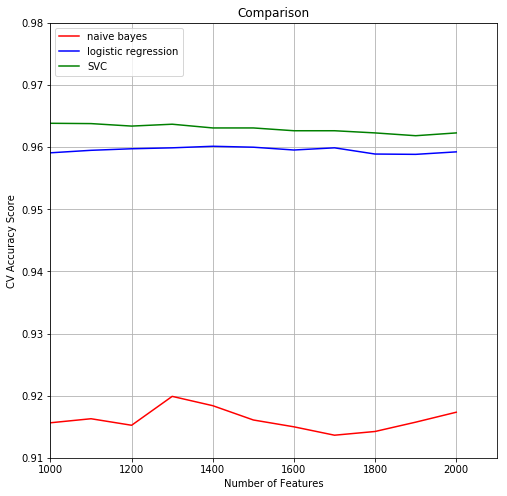

In [0]:
# Ploting the Accuracy against CV accuracies
plt.figure(figsize=(8, 8))
# plt.scatter(range(1000, 3301, 100), score, color='blue')
plt.plot(range(1000, 2001, 100), score['naive bayes'], color='red', label= 'naive bayes')
plt.plot(range(1000, 2001, 100), score['logistic'], color='blue', label= 'logistic regression')
plt.plot(range(1000, 2001, 100), score['svc'], color='green', label = 'SVC')
plt.xlabel('Number of Features')
plt.ylabel('CV Accuracy Score')
plt.grid()
plt.axis([1000, 2100, 0.91, 0.98])
plt.title("Comparison")
plt.legend(loc='upper left')
plt.show()

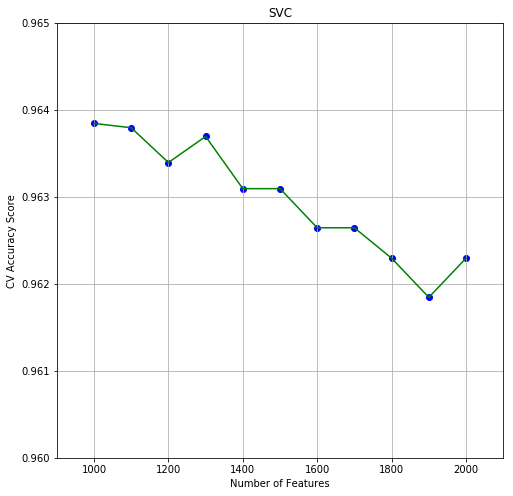

In [0]:
# Ploting the Accuracy against CV accuracies
plt.figure(figsize=(8, 8))
plt.scatter(range(1000, 2001, 100), score['svc'], color='blue')
plt.plot(range(1000, 2001, 100), score['svc'], color='green', label = 'SVC')
plt.xlabel('Number of Features')
plt.ylabel('CV Accuracy Score')
plt.grid()
plt.axis([900, 2100, 0.960, 0.965])
plt.title("SVC")
plt.show()

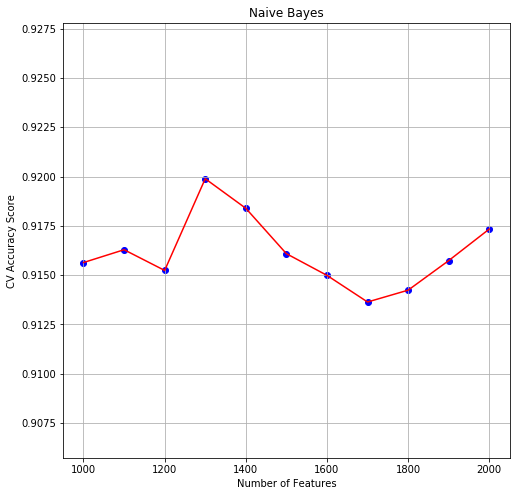

In [0]:
# Ploting the Accuracy against CV accuracies
plt.figure(figsize=(8, 8))
plt.scatter(range(1000, 2001, 100), score['naive bayes'], color='blue')
plt.plot(range(1000, 2001, 100), score['naive bayes'], color='red', label= 'naive bayes')
plt.xlabel('Number of Features')
plt.ylabel('CV Accuracy Score')
plt.grid()
# plt.axis([1000, 2100, 0.91, 0.98])
plt.title("Naive Bayes")
plt.show()

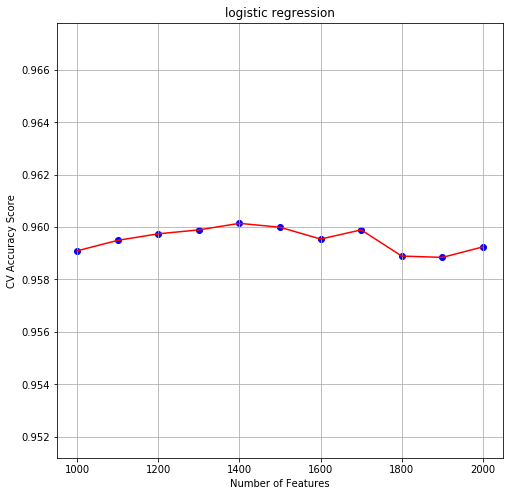

In [0]:
# Ploting the Accuracy against CV accuracies
plt.figure(figsize=(8, 8))
plt.scatter(range(1000, 2001, 100), score['logistic'], color='blue')
plt.plot(range(1000, 2001, 100), score['logistic'], color='red')
plt.xlabel('Number of Features')
plt.ylabel('CV Accuracy Score')
plt.grid()
# plt.axis([1000, 2100, 0.91, 0.98])
plt.title("logistic regression")
plt.show()

In [0]:
tfidf = TfidfVectorizer(max_features= 1000, ngram_range= (1,3))
X_final = tfidf.fit_transform(X).toarray()
X_final.shape , y_final.shape

((19997, 1000), (19997,))

In [0]:
# Feature names and Vocabulary
Features = tfidf.get_feature_names()
vocabulary = tfidf.vocabulary_

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14997, 1000), (5000, 1000), (14997,), (5000,))

In [0]:
# Saving the Feature set and Target set
# X_df = pd.DataFrame(data= X_final, columns= Features)
# X_df.to_csv("X.csv", index= False)

In [0]:
# y_df = pd.DataFrame(data= y_final, columns= ['Target'])
# y_df.to_csv("y.csv", index= False)
# y_real_df = pd.DataFrame(data= y, columns= ['Target'])
# y_real_df.to_csv("y_real.csv", index= False)

In [0]:
#fitting model
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
classifier.score(X_test, y_test)

0.9632

In [0]:
classifier.score(X_train, y_train)

0.9715943188637728

In [0]:
from sklearn.model_selection import GridSearchCV
param = {'C': [1, 10],
        'decision_function_shape' : ['ovr', 'ovo']}
gridcv = GridSearchCV(classifier,
                      scoring = 'accuracy',
                      param_grid= param,
                      n_jobs= -1,
                      cv= 5)
gridcv = gridcv.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
gridcv.best_score_

0.9622591184903647

In [0]:
gridcv.best_params_

{'C': 1, 'decision_function_shape': 'ovr'}

In [0]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       247
           1       1.00      0.96      0.98       249
           2       0.98      1.00      0.99       254
           3       0.98      1.00      0.99       259
           4       1.00      0.99      1.00       264
           5       0.98      0.98      0.98       250
           6       0.99      0.99      0.99       235
           7       0.99      1.00      0.99       237
           8       1.00      1.00      1.00       259
           9       1.00      1.00      1.00       264
          10       1.00      1.00      1.00       270
          11       0.99      1.00      0.99       243
          12       0.99      0.97      0.98       237
          13       0.99      1.00      0.99       254
          14       0.98      1.00      0.99       238
          15       1.00      1.00      1.00       266
          16       0.92      0.95      0.93       238
          17       0.98    

In [0]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(classifier, X_final, y_final, cv=5, n_jobs= -1)
print(cross_val_score)

[0.96       0.96375    0.96324081 0.96624156 0.9659915 ]


In [0]:
# Mean and Variance
print(f"The mean score is : {cross_val_score.mean()}")
print(f"The variance is : {cross_val_score.std()}")

The mean score is : 0.9638447736934234
The variance is : 0.0022587186581666894


In [0]:
#confusion metrice
from sklearn.metrics import confusion_matrix
# print(label_y.classes_)
print(confusion_matrix(y_test, y_pred))

[[182   0   0   0   0   0   0   0   0   0   0   1   0   0   1   0   0   0
    0  63]
 [  0 240   2   2   0   3   0   0   0   0   0   0   0   1   1   0   0   0
    0   0]
 [  0   0 253   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   1 258   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   2 262   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   0   0 246   0   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 233   1   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 237   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 259   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 264   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 270   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   0   0   0   0   0 242   0   0   0   0

In [0]:
label_y.classes_

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype='<U24')

In [0]:
def single_prediction(sentence):
    b = [] 
    single_predict = sub('[^a-zA-Z]', " ", sentence)
    single_predict = single_predict.strip().split()
    lemmatizer = WordNetLemmatizer()
    single_predict = [lemmatizer.lemmatize(word, pos = get_simple_pos(pos_tag([word])[0][1])).lower() for word in single_predict if not word.lower() in set(stopwords.words('english'))]
    single_predict = " ".join(single_predict)
    b.append(single_predict)
    single_predict = tfidf.transform(b).toarray()
    single_predict = classifier.predict(single_predict)
    print(f"Your text belongs to : {label_y.inverse_transform(single_predict)[0]} category")

In [0]:
a = input("Enter a text to classify = ")

Enter a text to classify = New Delhi: Ahead of official-level trade talks between India and the US this week in New Delhi, President Donald Trump has again warned India that its high tariff regime is not acceptable to the US.  “India has long had a field day putting Tariffs on American products. No longer acceptable!" Trump tweeted on Tuesday.  India has imposed retaliatory tariffs on 28 US products, including almonds and apples, starting 5 June, a year after announcing them to counter the increase in steel and aluminium tariffs by the US and the withdrawal of duty-free benefits to Indian exporters. Following the move, the US raised the dispute at the World Trade Organization (WTO). India also raised customs duties on a host of products, including alloy steel and auto parts, in the budget presented on 5 July.  Assistant US trade representative (USTR) Chris Wilson and USTR deputy assistant Brendan Lynch are expected to meet Indian officials to break the deadlock in trade ties.  Jayant D

In [0]:
single_prediction(a)

Your text belongs to : talk.politics.mideast category
